In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as st
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
iris = pd.read_csv("iris.csv")

In [8]:
iris.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

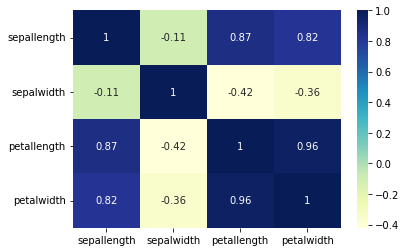

In [9]:
sns.set_palette("colorblind")
sns.heatmap(iris.corr(), cmap="YlGnBu", annot=True)

In [10]:
iris = iris[["sepallength","sepalwidth","petallength","petalwidth"]]

Text(0, 0.5, 'Petal width (cm)')

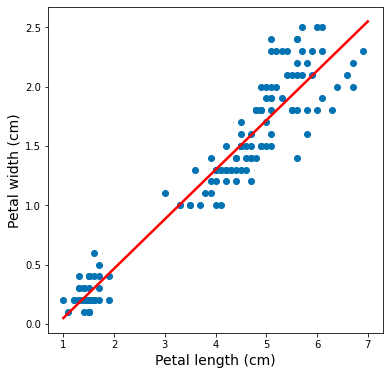

In [11]:
model1 = st.linregress(iris.iloc[:, 2], iris.iloc[:, 3])
plt.figure(figsize=(6, 6))
plt.scatter(iris.iloc[:, 2], iris.iloc[:, 3])
x = np.linspace(1,7,100)
y = model1[0]*x+model1[1]
plt.plot(x, y,'-r', linewidth=2.5)
plt.xlabel('Petal length (cm)', fontsize=14)
plt.ylabel('Petal width (cm)',fontsize=14)

In [12]:
scaler = StandardScaler()
iris = pd.DataFrame(scaler.fit_transform(iris), 
                   columns = ["sepallength","sepalwidth","petallength","petalwidth"])

In [13]:
pca = PCA(n_components = 4)
pca.fit(iris)

PCA(n_components=4)

In [14]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [15]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [16]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [20]:
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.89421016,  0.35854928, -0.27770122, -0.03773647],
       [-0.45081822,  0.89132754,  0.0932195 ,  0.01787973],
       [ 0.99500666,  0.02031465,  0.05426497,  0.11539407],
       [ 0.96822861,  0.06299656,  0.24411001, -0.07540887]])

Text(0, 0.5, 'Eigenvalues')

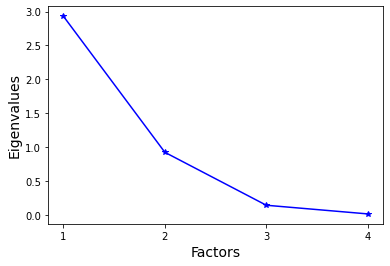

In [19]:
xint = range(0, 5)
plt.xticks(xint)
plt.plot([1,2,3,4], pca.explained_variance_, 'b*-')
plt.xlabel('Factors', fontsize="14")
plt.ylabel('Eigenvalues', fontsize="14")